In [ ]:
!pip install -e ..

## Data Loading

In [46]:
from instaffo_matching.data.loader import load_data, get_matching_dataframes
from instaffo_matching.data.preprocessor import standardize_data

import pandas as pd

data = load_data("../data/data.json")
talent_df, job_df, labels_df = get_matching_dataframes(data=data)

#### Exploring Dataframes

In [47]:
# Display the first 3 rows of the talent dataframe
talent_df.head(3)

,degree,job_roles,languages,salary_expectation,seniority
0,bachelor,"[frontend-developer, backend-developer, full-s...","[{'rating': 'C2', 'title': 'German'}, {'rating...",48000,junior
1,master,"[frontend-developer, full-stack-developer, c-c...","[{'rating': 'C2', 'title': 'German'}, {'rating...",44000,junior
2,none,"[frontend-developer, backend-developer, php-de...","[{'rating': 'C2', 'title': 'English'}, {'ratin...",40000,senior


In [48]:
# Display the first 3 rows of the job dataframe
job_df.sample(3)

,job_roles,languages,max_salary,min_degree,seniorities
1862,"[full-stack-developer, java-developer]","[{'title': 'German', 'rating': 'C1', 'must_hav...",82000,bachelor,"[none, junior, midlevel, senior]"
1165,[sales-manager],"[{'title': 'German', 'rating': 'C1', 'must_hav...",75000,doctorate,"[junior, midlevel, senior]"
604,[sales-manager],"[{'title': 'German', 'rating': 'C1', 'must_hav...",75000,none,"[junior, midlevel, senior]"


In [49]:
# Display the first 3 rows of the labels dataframe
labels_df.head(3)

,label
0,True
1,True
2,True


## Exploritory Data Anlysis

In [50]:
def get_unique_languages_and_levels(talent_df, job_df):
    print("Example language data from talent_df:", talent_df['languages'].iloc[0])
    print("Example language data from job_df:", job_df['languages'].iloc[0])

    # Extract languages and levels from talent_df
    talent_languages = [lang for sublist in talent_df['languages'] for lang in sublist]
    
    # Extract languages and levels from job_df
    job_languages = [lang for sublist in job_df['languages'] for lang in sublist]

    # Combine both lists
    combined_languages = talent_languages + job_languages
    
    # Get unique languages and levels
    unique_languages_and_levels = { (lang['title'], lang['rating']) for lang in combined_languages }

    # Separate languages and levels into two lists
    languages = [lang for lang, _ in unique_languages_and_levels]
    levels = [level for _, level in unique_languages_and_levels]
    
    return languages, levels

# Explore what are unique languages and levels
print("\nExploring Languages Feature\n")
languages, levels = get_unique_languages_and_levels(talent_df, job_df)
print("Languages:", sorted(set(languages)))
print("Levels:", sorted(set(levels)))

# Explore what are unique values of 'min_degree' from job_df
print("\nExploring Degrees Feature\n")
unique_min_degrees = sorted(job_df['min_degree'].unique())
print("Unique 'min_degree' values from job_df:")
print(unique_min_degrees)

# Explore what are unique values of 'degree' from talent_df
unique_degrees = sorted(talent_df['degree'].unique())
print("Unique 'degree' values from talent_df:")
print(unique_degrees)

# Explore what are unique values of 'seniority' from talent_df
print("\nExploring Seniority Feature\n")
unique_seniorities = sorted(talent_df['seniority'].unique())
print("Unique 'seniority' values from talent_df:")
print(unique_seniorities)

# Explore what are unique values of 'seniorities' from job_df
unique_seniorities_job = sorted(set(seniority for sublist in job_df['seniorities'] for seniority in sublist))
print("Unique 'seniorities' values from job_df:")
print(unique_seniorities_job)

# Explore what are unique values of 'job_roles' from talent_df 
print("\nExploring Job Role Feature\n")
unique_job_roles_talent = sorted(set(job_role for sublist in talent_df['job_roles'] for job_role in sublist))
print("Unique 'job_roles' values from talent_df:")
print(unique_job_roles_talent)

# Explore what are unique values of 'job_roles' from job_df
unique_job_roles_job = sorted(set(job_role for sublist in job_df['job_roles'] for job_role in sublist))
print("Unique 'job_roles' values from job_df:")
print(unique_job_roles_job)

# concatenate the dataframes for 
df = pd.concat([talent_df, job_df, labels_df], axis=1)


Exploring Languages Feature

Example language data from talent_df: [{'rating': 'C2', 'title': 'German'}, {'rating': 'C2', 'title': 'English'}, {'rating': 'B2', 'title': 'French'}, {'rating': 'A2', 'title': 'Turkish'}]
Example language data from job_df: [{'title': 'German', 'rating': 'C1', 'must_have': True}, {'title': 'English', 'rating': 'B2', 'must_have': True}]
Languages: ['Albanian', 'Arabic', 'Armenian', 'Bengalese', 'Bulgarian', 'Chinese', 'Croatian', 'Czech', 'Danish', 'Dutch', 'English', 'Finnish', 'French', 'German', 'Greek', 'Hebrew', 'Hindi', 'Hungarian', 'Italian', 'Japanese', 'Korean', 'Latvian', 'Macedonian', 'Norwegian', 'Persian', 'Polish', 'Portuguese', 'Romanian', 'Russian', 'Serbian', 'Slovak', 'Spanish', 'Swedish', 'Tamil', 'Turkish']
Levels: ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']

Exploring Degrees Feature

Unique 'min_degree' values from job_df:
['apprenticeship', 'bachelor', 'doctorate', 'master', 'none']
Unique 'degree' values from talent_df:
['apprenticeship', '

#### General data statistics 

In [51]:
print("Talents DataFrame:")
print(talent_df.info())

Talents DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   degree              2000 non-null   object
 1   job_roles           2000 non-null   object
 2   languages           2000 non-null   object
 3   salary_expectation  2000 non-null   int64 
 4   seniority           2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.2+ KB
None


In [52]:
print("\nJobs DataFrame:")
print(job_df.info())


Jobs DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job_roles    2000 non-null   object
 1   languages    2000 non-null   object
 2   max_salary   2000 non-null   int64 
 3   min_degree   2000 non-null   object
 4   seniorities  2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.2+ KB
None


In [53]:
print("\nLabels DataFrame:")
print(labels_df.info())


Labels DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   2000 non-null   bool 
dtypes: bool(1)
memory usage: 2.1 KB
None


In [54]:
print("\nTalents Summary Statistics:")
print(talent_df.describe())
print("\nJobs Summary Statistics:")
print(job_df.describe())
print("\nLabels Summary Statistics:")
print(labels_df.describe())


Talents Summary Statistics:
       salary_expectation
count         2000.000000
mean         71710.889500
std          21867.684002
min          25000.000000
25%          55000.000000
50%          70000.000000
75%          86800.000000
max         137080.000000

Jobs Summary Statistics:
          max_salary
count    2000.000000
mean    72658.000000
std      9237.678461
min     45000.000000
25%     70000.000000
50%     70000.000000
75%     80000.000000
max    100000.000000

Labels Summary Statistics:
       label
count   2000
unique     2
top     True
freq    1000


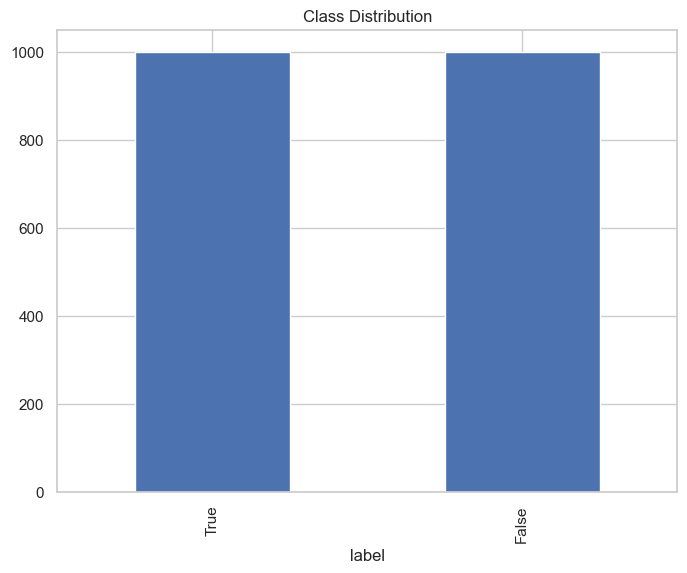

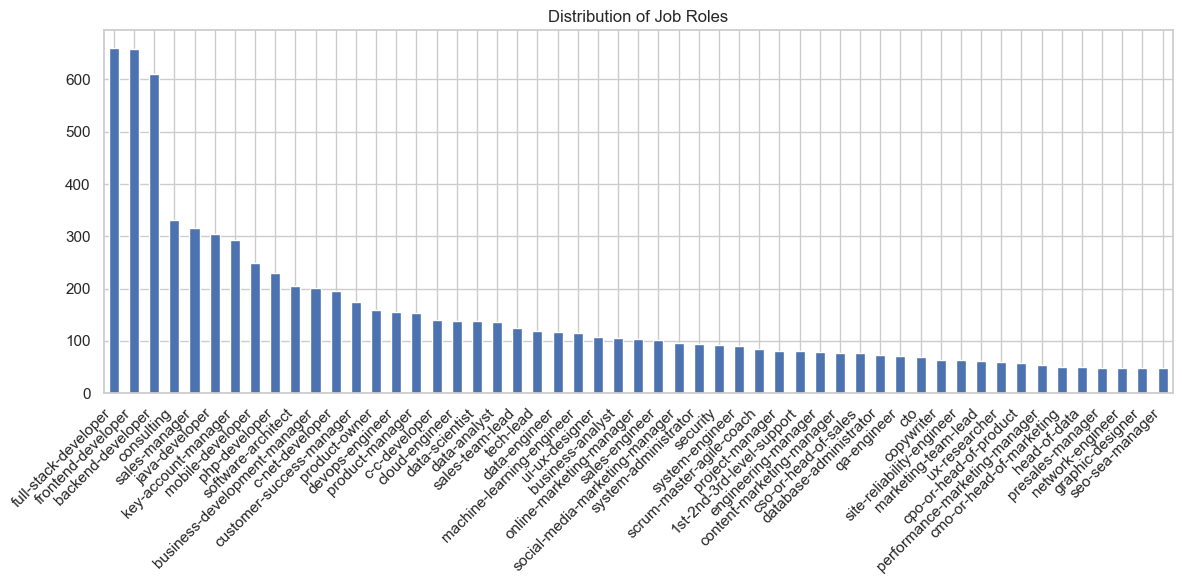

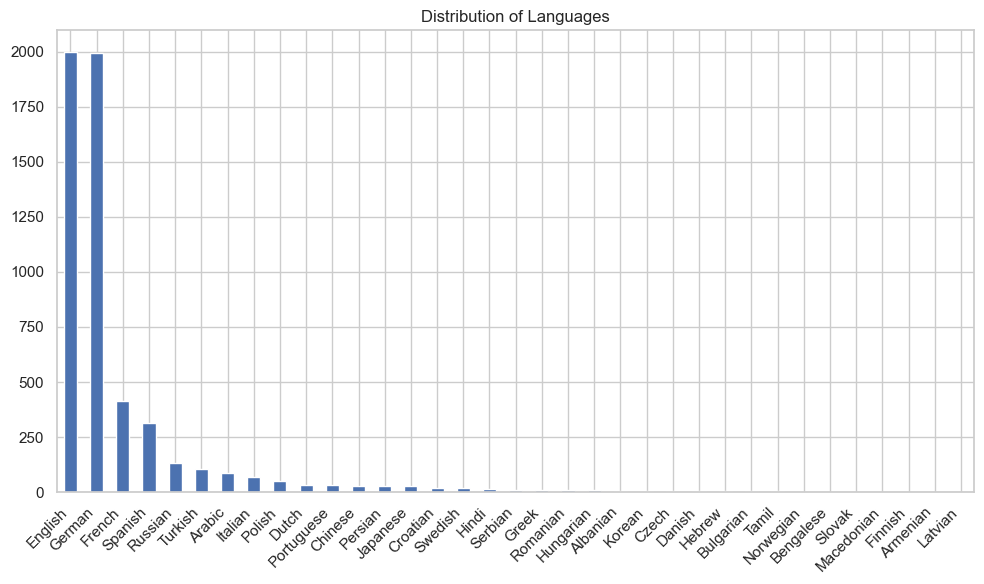

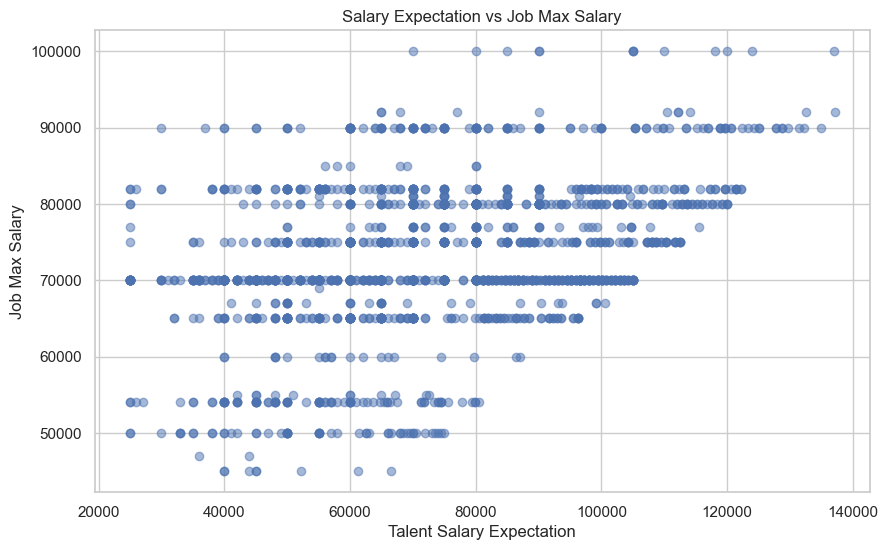

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set Seaborn style
sns.set(style="whitegrid")

# Check class balance
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

# Analyze job roles
job_roles = [role for item in data for role in item['talent']['job_roles']]
plt.figure(figsize=(12, 6))
pd.Series(Counter(job_roles)).sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Job Roles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze language distributions
languages = [lang['title'] for item in data for lang in item['talent']['languages']]
plt.figure(figsize=(10, 6))
pd.Series(Counter(languages)).sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze salary expectations vs max salaries
plt.figure(figsize=(10, 6))
plt.scatter(talent_df['salary_expectation'], job_df['max_salary'], alpha=0.5)
plt.xlabel('Talent Salary Expectation')
plt.ylabel('Job Max Salary')
plt.title('Salary Expectation vs Job Max Salary')
plt.show()


**Comment on above**

- Analysis reveals that the dataset exhibits a high degree of consistency and standardization across features such as languages, degrees, seniorities, and job roles. This uniformity mitigates the need for extensive preprocessing.
- There are no missing values to handle. The presence of 'none' values in 'min degree' and seniority attributes will be interpreted as categorical data rather than missing values.
- Lastly, the balanced distribution of labels eliminates the common issue of class imbalance, obviating the need for techniques to manage skewed datasets. This eliminates the potentially enhancing the predictive performance without the need for handling hard negatives.